In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Messwerte Versuch 1: Technischer Widerstand

# Einheiten: V, mA
exp1 = pd.DataFrame({
    "U":  [0.085, 0.215, 0.352, 0.424, 0.502, 0.602, 0.703, 0.859, 0.968, 1.060,
           -0.156, -0.405, -.553, -0.604, -0.704, -0.747, -0.793, -0.876, -0.940, -1.551],
    "I":  [1.03,  2.62,  4.29,  5.18,  6.13,  7.36,  8.59,  10.50, 11.83, 12.96,
           -1.90,  -4.96,  -6.76, -7.38,  -8.60,  -9.12,  -9.69,  -10.71, -11.49, -18.96 ]
})

# digital: 0.5% + 1
exp1["dU"] = (exp1["U"] * 0.005 + 0.001).abs()

# digital: 0.8% + 0.01
exp1["dI"] = (exp1["I"] * 0.015 + 0.001).abs()

exp1["R"] = exp1["U"] / exp1["I"] * 1e3
exp1["dR"] = ((exp1["dU"]/exp1["I"])**2 + (exp1["U"]/exp1["I"]**2 * exp1["dI"])**2).pow(0.5) * 1e3
    
exp1

,U,I,dU,dI,R,dR
0,0.085,1.03,0.001425,0.01645,82.524272,1.910796
1,0.215,2.62,0.002075,0.04030,82.061069,1.490128
2,0.352,4.29,0.002760,0.06535,82.051282,1.405755
3,0.424,5.18,0.003120,0.07870,81.853282,1.381785
4,0.502,6.13,0.003510,0.09295,81.892333,1.367404
5,0.602,7.36,0.004010,0.11140,81.793478,1.352601
6,0.703,8.59,0.004515,0.12985,81.839348,1.344145
7,0.859,10.50,0.005295,0.15850,81.809524,1.333929
8,0.968,11.83,0.005840,0.17845,81.825866,1.329364
9,1.060,12.96,0.006300,0.19540,81.790123,1.325517


In [3]:
# Lineare regression für I = c*U
# (nach Datenanalyse B)

x = exp1["U"]
y = exp1["I"]
dy = exp1["dI"]
M = np.column_stack((x,))
Vinv = np.diag(dy**-2)

(c1,) = tuple(np.linalg.pinv(M.T.dot(Vinv).dot(M)).dot(M.T).dot(Vinv).dot(y))
Vp = np.linalg.pinv(M.T.dot(Vinv).dot(M))
dc1 = (Vp[0][0])**0.5

X2_1 = ((y-c1*x)**2/dy**2).sum()
dof_1 = len(x) - 2

R1  = 1/c1 * 1e3 # ohm
dR1 = 1/c1**2 * dc1 * 1e3 # ohm

(c1, dc1, R1, dR1, X2_1, dof_1)

(12.211599818576055,
 0.04105725358249311,
 81.88935232538647,
 0.2753244418487307,
 0.3882876282488006,
 18)

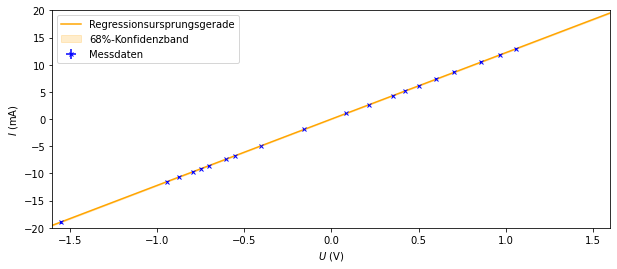

In [4]:
plt.figure(figsize=(10, 4))
plt.ylim(-20, 20)
plt.xlim(-1.6, 1.6)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ ($\mathrm{V}$)')
plt.ylabel(r'$I$ ($\mathrm{mA}$)')

plt.plot([-1.6,1.6],[c1*-1.6, c1*1.6], label=f'Regressionsursprungsgerade', color="orange")
plt.fill_between([-1.6,1.6], [(c1-dc1)*-1.6, (c1-dc1)*1.6],[(c1+dc1)*-1.6, (c1+dc1)*1.6], alpha=0.2, color="orange", label="68%-Konfidenzband")

plt.errorbar(exp1["U"], exp1["I"], exp1["dI"], exp1["dU"], label='Messdaten', marker = "x", ms=4, ls='none', color="blue")
#plt.errorbar(df["m"], df["s"], 0.01, 0, label='Fehlerbalken', ms=4, ls='none')
plt.legend(loc='upper left')
plt.savefig(f"plot1.pdf")
plt.show()

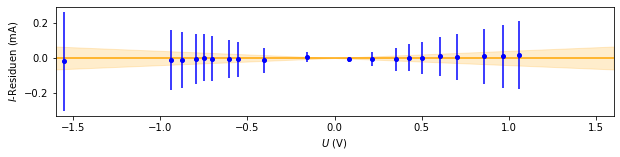

In [5]:
plt.figure(figsize=(10, 2))
plt.xlim(-1.6, 1.6)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ (V)')
plt.ylabel(r'$I$-Residuen (mA)')
plt.plot([-1.6,1.6],[0, 0], label=f'Regressionsgerade', color="orange")
plt.fill_between([-1.6,1.6], [(-dc1)*-1.6, (-dc1)*1.6],[(+dc1)*-1.6, (+dc1)*1.6], alpha=0.2, color="orange", label="68%-Konfidenzband")
plt.errorbar(exp1["U"], exp1["I"] - c1*exp1["U"], exp1["dI"], exp1["dU"], label='Residuen', marker = "o", ms=4, ls='none', color="blue")

#plt.legend(loc='upper right')
plt.savefig(f"plot1residuen.pdf")
plt.show()

In [6]:
with open("table1.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{SSS}
\\toprule
{$U$ (\\unit{\\V})} & {$I$ (\\unit{\\mA})} & {$R$ (\\unit{\\ohm})} \\\\
\\midrule
''')
    for index, row in exp1.iterrows():
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['I']}\\pm{row['dI']} & ")
        f.write(f"{row['R']}\\pm{row['dR']} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [7]:
# Messwerte Versuch 2: Glühbirne

# Einheiten: V, mA
exp2 = pd.DataFrame({
    "U":  [0.47, 0.95, 1.22, 1.54, 1.84, 2.05, 2.47, 2.97,
           3.82, 4.44, 5.11, 9.84, 6.23, 6.96, 7.92, 9.05,
           -1.07, -2.04, -3.16, -4.08, -4.97, -6.00, -7.08, -7.97, -8.97, -9.84],
    "I":  [16.4, 23.3, 26.8, 30.7, 33.9, 36.0, 40.2, 44.8,
           52.4, 57.2, 62.3, 92.2, 70.0, 74.9, 80.9, 87.7,
           -24.6, -35.9, -46.5, -54.2, -61.1, -68.5, -75.5, -81.4, -87.2, -92.3]
})

# digital: 0.5% + 10mV
exp2["dU"] = (exp2["U"] * 0.005 + 0.01).abs()

# digital: 1.5% + 0.1mA
exp2["dI"] = (exp2["I"] * 0.015 + 0.1).abs()

exp2["R"] = exp2["U"] / exp2["I"] * 1e3
exp2["dR"] = ((exp2["dU"]/exp2["I"])**2 + (exp2["U"]/exp2["I"]**2 * exp2["dI"])**2).pow(0.5) * 1e3
    
exp2

,U,I,dU,dI,R,dR
0,0.47,16.4,0.01235,0.3460,28.658537,0.965740
1,0.95,23.3,0.01475,0.4495,40.772532,1.009680
2,1.22,26.8,0.01610,0.5020,45.522388,1.043066
3,1.54,30.7,0.01770,0.5605,50.162866,1.082206
4,1.84,33.9,0.01920,0.6085,54.277286,1.126933
5,2.05,36.0,0.02025,0.6400,56.944444,1.158123
6,2.47,40.2,0.02235,0.7030,61.442786,1.209802
7,2.97,44.8,0.02485,0.7720,66.294643,1.269942
8,3.82,52.4,0.02910,0.8860,72.900763,1.351960
9,4.44,57.2,0.03220,0.9580,77.622378,1.416686


In [8]:
# Lineare Regression für I = a*U + b*U^3

x = exp2["U"]
y = exp2["I"]
dy = exp2["dI"]
M = np.column_stack((x, x**3))
Vinv = np.diag(dy**-2)

(a2q,b2q) = tuple(np.linalg.pinv(M.T.dot(Vinv).dot(M)).dot(M.T).dot(Vinv).dot(y))
Vp = np.linalg.pinv(M.T.dot(Vinv).dot(M))
da2q = (Vp[0][0])**0.5
db2q = (Vp[1][1])**0.5

# Modell und Konfidenzinterval
def m2q(x):
    A = np.asarray((x, x**3))
    return A.T.dot((a2q, b2q))
def dm2q(x):
    A = np.asarray((x, x**3))
    return math.sqrt(A.dot(Vp).dot(A.T))

X2_2q = ((y-m2q(x))**2/dy**2).sum()
dof_2q = len(x) - 2

(a2q,da2q,b2q,db2q, X2_2q, dof_2q)

(16.185711504480224,
 0.06734309521650214,
 -0.08482659918456946,
 0.0011768583504398933,
 3155.733607790688,
 24)

In [9]:
# Lineare Regression für I = a*U + b*arctan(U)

x = exp2["U"]
y = exp2["I"]
dy = exp2["dI"]
M = np.column_stack((x, np.arctan(x)))
Vinv = np.diag(dy**-2)

(a2a,b2a) = tuple(np.linalg.pinv(M.T.dot(Vinv).dot(M)).dot(M.T).dot(Vinv).dot(y))
Vp = np.linalg.pinv(M.T.dot(Vinv).dot(M))
da2a = (Vp[0][0])**0.5
db2a = (Vp[1][1])**0.5

# Modell und Konfidenzinterval
def m2a(x):
    A = np.asarray((x, np.arctan(x)))
    return A.T.dot((a2a, b2a))
def dm2a(x):
    A = np.asarray((x, np.arctan(x)))
    return math.sqrt(A.dot(Vp).dot(A.T))

X2_2a = ((y-m2a(x))**2/dy**2).sum()
dof_2a = len(x) - 2

(a2a,da2a,b2a,db2a, X2_2a, dof_2a)

(6.128593619547221,
 0.07659683834498186,
 22.036837779574704,
 0.24332252384572234,
 148.82713602429988,
 24)

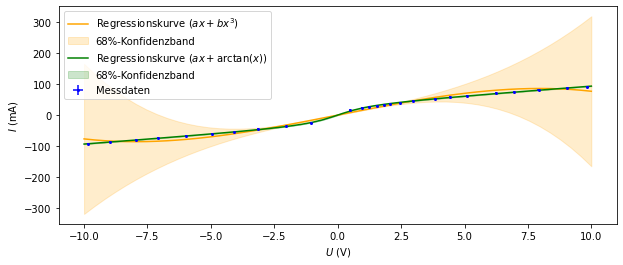

In [10]:
plt.figure(figsize=(10, 4))
#plt.ylim(-20, 20)
plt.xlim(-11, 11)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ ($\mathrm{V}$)')
plt.ylabel(r'$I$ ($\mathrm{mA}$)')

xs = pd.Series(np.linspace(-10,10))
ysq = m2q(xs)
ysa = m2a(xs)
plt.plot(xs, ysq, label='Regressionskurve ($ax + bx^3$)', color="orange")
plt.fill_between(xs, [ m2q(x) - dm2q(x) for x in xs], [m2q(x) + dm2q(x) for x in xs], alpha=0.2, color="orange", label="68%-Konfidenzband")
plt.plot(xs, ysa, label='Regressionskurve ($ax + \\mathrm{arctan}(x)$)', color="green")
plt.fill_between(xs, [ m2a(x) - dm2a(x) for x in xs], [m2a(x) + dm2a(x) for x in xs], alpha=0.2, color="green", label="68%-Konfidenzband")

plt.errorbar(exp2["U"], exp2["I"], exp2["dI"], exp2["dU"], label='Messdaten', marker = ".", ms=4, ls='none', color="blue")
plt.legend(loc='upper left')
plt.savefig(f"plot2.pdf")
plt.show()

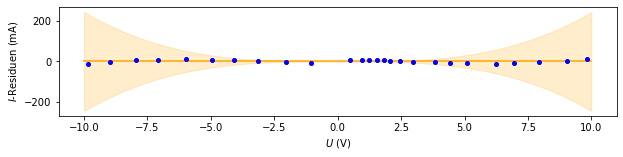

In [11]:
plt.figure(figsize=(10, 2))
plt.xlim(-11, 11)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ (V)')
plt.ylabel(r'$I$-Residuen (mA)')
plt.plot([-10,10],[0, 0], label=f'Regressionsgerade', color="orange")
plt.fill_between(xs, [ - dm2q(x) for x in xs], [ dm2q(x) for x in xs], alpha=0.2, color="orange", label="68%-Konfidenzband")

plt.errorbar(exp2["U"], exp2["I"] - (a2q*exp2["U"] + b2q*exp2["U"]**3) , exp2["dI"], exp2["dU"], label='Residuen', marker = "o", ms=4, ls='none', color="blue")

#plt.legend(loc='upper right')
plt.savefig(f"plot2residuen1.pdf")
plt.show()

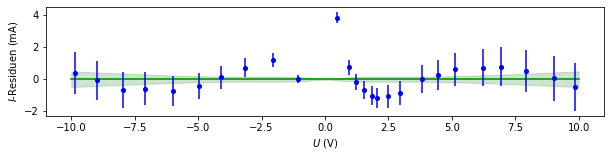

In [12]:
plt.figure(figsize=(10, 2))
plt.xlim(-11, 11)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ (V)')
plt.ylabel(r'$I$-Residuen (mA)')
plt.plot([-10,10],[0, 0], label=f'Regressionsgerade', color="green")
plt.fill_between(xs, [ - dm2a(x) for x in xs], [ dm2a(x) for x in xs], alpha=0.2, color="green", label="68%-Konfidenzband")
plt.errorbar(exp2["U"], exp2["I"] - (a2a*exp2["U"] + b2a*np.arctan(exp2["U"])) , exp2["dI"], exp2["dU"], label='Residuen', marker = "o", ms=4, ls='none', color="blue")

#plt.legend(loc='upper right')
plt.savefig(f"plot2residuen2.pdf")
plt.show()

In [13]:
with open("table2.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{SSS}
\\toprule
{$U$ (\\unit{\\V})} & {$I$ (\\unit{\\mA})} & {$R$ (\\unit{\\ohm})} \\\\
\\midrule
''')
    for index, row in exp2.iterrows():
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['I']}\\pm{row['dI']} & ")
        f.write(f"{row['R']}\\pm{row['dR']} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [14]:
# Messwerte Versuch 3: LED

# Einheiten: V, mA
exp3 = pd.DataFrame({
    "U":  [1.988, 1.892, 1.782, 1.569,   1.275,   1.926,  2.10,  2.22, 2.32],
    "UR": [1,     1,     1,     1,       1,       1,      2,     2,    2],
    "I":  [8.08,  2.96,  0.40,  0.00281, 0.0001,  4.14,   15.82, 26.0, 35.3],
    "IR": [1,     1,     1,     2,       2,       1,      2,     3,    3],
})

# digital: 0.5% + 1mV
exp3["dU"] = (exp3["U"] * 0.005 + 0.001).where(exp3["UR"]==1)
# digital: 0.5% + 10mV
exp3["dU"] = (exp3["U"] * 0.005 + 0.01).where(exp3["UR"]==2, other=exp3["dU"]).abs()

# digital: 0.8% + 10µA
exp3["dI"] = (exp3["U"] * 0.008 + 0.01).where(exp3["IR"]==1)
# digital: 2% + 0.05µA
exp3["dI"] = (exp3["U"] * 0.02  + 0.00005).where(exp3["IR"]==2, other=exp3["dI"])
# digital: 1.5% + 0.1mA
exp3["dI"] = (exp3["U"] * 0.015 + 0.1).where(exp3["IR"]==3, other=exp3["dI"]).abs()


exp3["R"] = exp3["U"] / exp3["I"] * 1e3
exp3["dR"] = ((exp3["dU"]/exp3["I"])**2 + (exp3["U"]/exp3["I"]**2 * exp3["dI"])**2).pow(0.5) * 1e3
    
exp3

,U,UR,I,IR,dU,dI,R,dR
0,1.988,1,8.08000,1,0.010940,0.025904,2.460396e+02,1.566970e+00
1,1.892,1,2.96000,1,0.010460,0.025136,6.391892e+02,6.476882e+00
2,1.782,1,0.40000,1,0.009910,0.024256,4.455000e+03,2.712849e+02
3,1.569,1,0.00281,2,0.008845,0.031430,5.583630e+05,6.245321e+06
4,1.275,1,0.00010,2,0.007375,0.025550,1.275000e+07,3.257625e+09
5,1.926,1,4.14000,1,0.010630,0.025408,4.652174e+02,3.839858e+00
6,2.100,2,15.82000,2,0.020500,0.042050,1.327434e+02,1.343005e+00
7,2.220,2,26.00000,3,0.021100,0.133300,8.538462e+01,9.220785e-01
8,2.320,2,35.30000,3,0.021600,0.134800,6.572238e+01,6.613676e-01


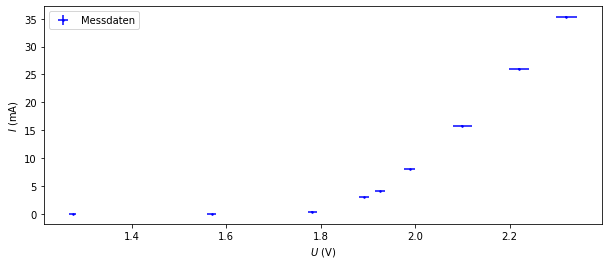

In [15]:
plt.figure(figsize=(10, 4))
#plt.ylim(-20, 20)
#plt.xlim(-1.6, 1.6)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ ($\mathrm{V}$)')
plt.ylabel(r'$I$ ($\mathrm{mA}$)')

#plt.plot([-1.6,1.6],[c1*-1.6, c1*1.6], label=f'Regressionsursprungsgerade')
#plt.plot([-1.6,1.6],[(c1+dc1)*-1.6, (c1+dc1)*1.6], label=f'+$\sigma$', color="orange")
#plt.plot([-1.6,1.6],[(c1-dc1)*-1.6, (c1-dc1)*1.6], label=f'-$\sigma$', color="orange")

plt.errorbar(exp3["U"], exp3["I"], exp3["dI"], exp3["dU"], label='Messdaten', marker = ".", ms=3, ls='none', color="blue")
#plt.errorbar(df["m"], df["s"], 0.01, 0, label='Fehlerbalken', ms=4, ls='none')
plt.legend(loc='upper left')
plt.savefig(f"plot3.pdf")
plt.show()

In [16]:
with open("table3.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{SSS}
\\toprule
{$U$ (\\unit{\\V})} & {$I$ (\\unit{\\mA})} & {$R$ (\\unit{\\ohm})} \\\\
\\midrule
''')
    for index, row in exp3.iterrows():
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['I']}\\pm{row['dI']} & ")
        f.write(f"{row['R']}\\pm{row['dR']} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [17]:
# Messwerte Versuch 4: Unbekanntes Bauteil

# Einheiten: V, mA
exp4 = pd.DataFrame({
    "U":  [0.0180, 0.0329, 0.0552, 0.281, 0.316, 0.392, 0.491, 0.570, 0.658, 0.735, 0.771],
    "UR": [1,     1,     1,     2,     2,     2,     2,     2,     2,     2,     2,   ],
    "I":  [5.88,  10.74, 18.05, 90.1,  100.8, 123.4, 150.0, 167.5, 185.0, 193.4, 195.9],
    "IR": [1,     1,     1,     2,     2,     2,     2,     2,     2,     2,     2,   ],
})

# digital: 0.5% + 0.1mV
exp4["dU"] = (exp4["U"] * 0.005 + 0.0001).where(exp4["UR"]==1)
# digital: 0.5% + 1mV
exp4["dU"] = (exp4["U"] * 0.005 + 0.001).where(exp4["UR"]==2, other=exp4["dU"]).abs()

# digital: 0.8% + 10µA
exp4["dI"] = (exp4["U"] * 0.008 + 0.01).where(exp4["IR"]==1)
# digital: 1.5% + 0.1mA
exp4["dI"] = (exp4["U"] * 0.015 + 0.1).where(exp4["IR"]==2, other=exp4["dI"]).abs()

exp4["R"] = exp4["U"] / exp4["I"] * 1e3
exp4["dR"] = ((exp4["dU"]/exp4["I"])**2 + (exp4["U"]/exp4["I"]**2 * exp4["dI"])**2).pow(0.5) * 1e3
    
exp4

,U,UR,I,IR,dU,dI,R,dR
0,0.0180,1,5.88,1,0.000190,0.010144,3.061224,0.032742
1,0.0329,1,10.74,1,0.000264,0.010263,3.063315,0.024801
2,0.0552,1,18.05,1,0.000376,0.010442,3.058172,0.020906
3,0.2810,2,90.10,2,0.002405,0.104215,3.118757,0.026935
4,0.3160,2,100.80,2,0.002580,0.104740,3.134921,0.025802
5,0.3920,2,123.40,2,0.002960,0.105880,3.176661,0.024141
6,0.4910,2,150.00,2,0.003455,0.107365,3.273333,0.023152
7,0.5700,2,167.50,2,0.003850,0.108550,3.402985,0.023091
8,0.6580,2,185.00,2,0.004290,0.109870,3.556757,0.023285
9,0.7350,2,193.40,2,0.004675,0.111025,3.800414,0.024271


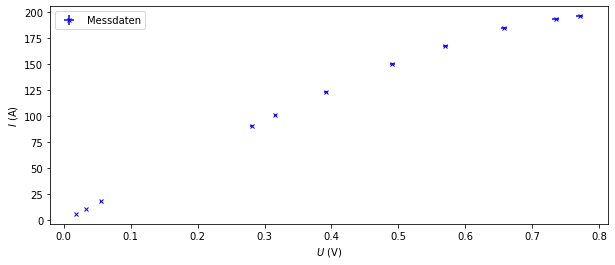

In [18]:
plt.figure(figsize=(10, 4))
#plt.ylim(-20, 20)
#plt.xlim(-1.6, 1.6)
#plt.margins(x=0, y =0)
plt.xlabel(r'$U$ ($\mathrm{V}$)')
plt.ylabel(r'$I$ ($\mathrm{A}$)')

plt.errorbar(exp4["U"], exp4["I"], exp4["dI"], exp4["dU"], label='Messdaten', marker = "x", ms=4, ls='none', color="blue")
#plt.errorbar(df["m"], df["s"], 0.01, 0, label='Fehlerbalken', ms=4, ls='none')
plt.legend(loc='upper left')
plt.savefig(f"plot4.pdf")
plt.show()

In [19]:
with open("table4.tex","w") as f:
    f.write('''
\\begingroup
\\sisetup{round-mode=uncertainty,round-precision=2}
\\begin{tabular}{SSS}
\\toprule
{$U$ (\\unit{\\V})} & {$I$ (\\unit{\\mA})} & {$R$ (\\unit{\\ohm})} \\\\
\\midrule
''')
    for index, row in exp4.iterrows():
        f.write(f"{row['U']}\\pm{row['dU']} & ")
        f.write(f"{row['I']}\\pm{row['dI']} & ")
        f.write(f"{row['R']}\\pm{row['dR']} ")
        f.write(" \\\\\n")
        
    f.write('''
\\bottomrule
\\end{tabular}
\\endgroup
''')


In [20]:
R1_lit = 82.5# Ohm
dR1_lit = R1_lit * 0.01
t = abs(R1-R1_lit)/(dR1**2 + dR1_lit**2)**0.5
t

0.7021125760141528

In [22]:
# Exporting all locals

outfile = open("defs.tex", "w")
outfile.write(r"""
\newcommand{\DefVal}[2]{%
  \expandafter\newcommand\csname val-#1\endcsname{#2}%
}
\newcommand{\Val}[1]{\csname val-#1\endcsname}
""")
for (n, x) in list(locals().items()):
    if type(x) in [int,float, np.float64, np.int64]:
        outfile.write(f"\\DefVal{{{n}}}{{{np.format_float_positional(x, trim='-')}}}\n")
outfile.close()
#print(open("defs.tex").read())